In [0]:
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp

file_data   = "/content/drive/My Drive/Colab Notebooks/assignment-02/mnist.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)


for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector

    count += 1
"""
#
# plot first 150 images out of 10,000 with their labels
#
f1 = plt.figure(1,(15,15))

for i in range(150):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    f1.subplots_adjust(hspace = 2.3)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)


#plt.show()

#
# plot the average image of all the images for each digit
#
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(num_image):

    im_average[:, list_label[i]] += list_image[:, i]
    im_count[list_label[i]] += 1

for i in range(10):

    im_average[:, i] /= im_count[i]

    plt.subplot(2, 5, i+1)
    plt.title(i)
    f2.subplots_adjust(hspace = 0.5)
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()


"""
q=1

In [0]:
def one_hot(label):
    one_hot.ones = cp.eye(10)
    #print(one_hot.ones[0].shape)
    #print(label.shape[0])
    for x in range (label.shape[0]):
        if (x == 0): 
            result = one_hot.ones[label[x]].view().reshape(1,-1)
        else:     
            result = cp.concatenate((result,one_hot.ones[label[x]].view().reshape(1,-1)), axis=0)
            
    #print(result.shape)
    #print(result.T[:,0])
    #print(label[0])
    return result.T

In [0]:
GT_train_image = cp.asarray(list_image[:,0:6000])
GT_train_label = one_hot(cp.asarray(list_label[0:6000]))
GT_test_image = cp.asarray(list_image[:,6000:num_image])
GT_test_label = one_hot(cp.asarray(list_label[6000:num_image]))


In [0]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [0]:


def h(X, th):
    bias = cp.ones(X.shape[1]).reshape(1,-1)

    a_1 = X
    a_1 = cp.concatenate((bias, a_1), axis=0)
    #print(a_1.shape)

    z_2 = cp.matmul(th[0], a_1)
    a_2 = sigmoid(z_2)
    a_2 = cp.concatenate((bias, a_2), axis=0)
    #print(a_2.shape)

    z_3 = cp.matmul(th[1], a_2)
    a_3 = sigmoid(z_3)
    a_3 = cp.concatenate((bias, a_3), axis=0)
    #print(a_3.shape)

    z_4 = cp.matmul(th[2], a_3)
    a_4 = sigmoid(z_4)
    #print(a_4.shape)
    return (a_4)

#h(GT_train_image, g_th).shape


In [0]:
def J(l, h):
    #print(l.shape)
    #print(h.shape)
    single = (-l*cp.log(h) - (1-l)*cp.log(1-h))
    return (1/h.shape[1])*cp.sum(single)



In [0]:
def backProp(X, th, l):
    bias = cp.ones(X.shape[1]).reshape(1,-1)

    a_1 = X
    a_1 = cp.concatenate((bias, a_1), axis=0)
    #print(a_1.shape)

    z_2 = cp.matmul(th[0], a_1)
    a_2 = sigmoid(z_2)
    a_2 = cp.concatenate((bias, a_2), axis=0)
    #print(a_2.shape)

    z_3 = cp.matmul(th[1], a_2)
    a_3 = sigmoid(z_3)
    a_3 = cp.concatenate((bias, a_3), axis=0)
    #print(a_3.shape)

    z_4 = cp.matmul(th[2], a_3)
    a_4 = sigmoid(z_4)
    #print(a_4.shape)

    d_4 = a_4 - l
    #print(d_4.shape)

    #print(th[2].T.shape)
    #print(d_4.shape)
    #print(a_3.shape)
    d_3 = cp.matmul(th[2].T, d_4) * (a_3* (1-a_3))
    #print(d_3.shape)

    #print(th[1].T.shape)
    #print(d_3[1:,:].shape)
    #print(a_2.shape)
    d_2 = cp.matmul(th[1].T, d_3[1:,:]) * (a_2* (1-a_2))
    #print(d_2.shape)


    # let's make del_theta
    #print(a_3.shape)
    #print(d_4.shape)
    for i in range(d_4.shape[0]):
        if (i == 0): 
            #print(a_3.shape)
            #print(d_4[i,:].shape) 
            DMAT_3 = np.sum(a_3*d_4[i,:], axis=1).reshape(-1,1)
            #print(DMAT_3.shape)
        else:     
            #print(DMAT_3.shape)
            #print(np.sum(a_3*d_4[i,:], axis=1).reshape(-1,1).shape)
            DMAT_3 = cp.concatenate((DMAT_3,np.sum(a_3*d_4[i,:], axis=1).reshape(-1,1)), axis=1)
        #print((a_3*d_4[i,:]).shape)
    #print(DMAT_3.T.shape)
    for i in range(d_3.shape[0]):
        if (i == 0): #not in concern
            pass
        elif (i==1):
            DMAT_2 = np.sum(a_2*d_3[i,:], axis=1).reshape(-1,1)
            #print(DMAT_2.shape)
        else:     
            DMAT_2 = cp.concatenate((DMAT_2,np.sum(a_2*d_3[i,:], axis=1).reshape(-1,1)), axis=1)
    #print(DMAT_2.T.shape)
    for i in range(d_2.shape[0]):
        if (i == 0): 
            pass
        elif(i==1):
            DMAT_1 = np.sum(a_1*d_2[i,:], axis=1).reshape(-1,1)
        else:     
            DMAT_1 = cp.concatenate((DMAT_1,np.sum(a_1*d_2[i,:], axis=1).reshape(-1,1)), axis=1)
    #print(DMAT_1.T.shape)

    m = d_4.shape[1]
    result=[DMAT_1.T/m, DMAT_2.T/m, DMAT_3.T/m]
    return result




In [87]:
def GD(th, DMAT, lr):
    n_th = [th[0]-lr*DMAT[0], th[1]-lr*DMAT[1], th[2]-lr*DMAT[2]]
    return n_th

def accuracy(data, th):
    cp.argmax(h(data, th))


g_th = [cp.random.normal(size=(196, 785)), cp.random.normal(size=(49, 197)), cp.random.normal(size=(10,50))]
J_log_train = [J(GT_train_label,  h(GT_train_image, g_th))]
J_log_test = [J(GT_test_label,  h(GT_test_image, g_th))]
accuracy_train = []
accuracy_test = []
lr = 0.03

alpha = 0.03
from tqdm.notebook import tqdm
for i in tqdm(range(500)):
    J_log_train.append(J(GT_train_label, h(GT_train_image, g_th)))
    J_log_test.append(J(GT_test_label, h(GT_test_image, g_th)))
    Dmat = backProp(GT_train_image, g_th, GT_train_label)
    g_th = GD(g_th, Dmat, alpha)



1. Plot the loss curve

plot the training loss at every iteration of gradient descent using the training data in blue color (the first 6,000 images) [5pt]


plot the testing loss at every iteration of gradient descent using the testing data in red color (the rest 4,000 images) [5pt]


the both curves should be presented in one figure

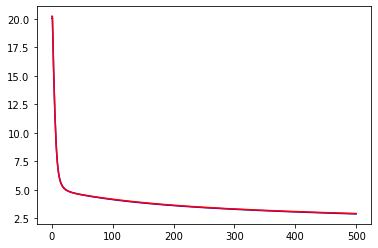

In [88]:
plt.plot(J_log_train,c='blue')
plt.plot(J_log_test,c='red')
plt.show()

In [19]:
print(list_image.shape)
print(list_label.shape)




dict = {}

for l in range(10):
    # 레이블이 l로 된 것들의 인덱스를 추출하자
    eq_list = np.equal(l, list_label)
    print(list_image[:,eq_list].shape) # (784, 레이블이 l인 이미지 수)
    l_images_list = list_image[:,eq_list]
    mean_of_l = np.mean(l_images_list, axis=1)

    dict[l] = mean_of_l



(784, 10000)
(10000,)
(784, 980)
(784, 1135)
(784, 1032)
(784, 1010)
(784, 982)
(784, 892)
(784, 958)
(784, 1028)
(784, 974)
(784, 1009)


In [0]:

result = []
theta = np.random.normal(size=size_row * size_col)
for l in range(10):
    eq_list = np.equal(l, list_label)
    l_images_list = list_image[:,eq_list]
    mean = np.mean(sigmoid(np.dot(theta, l_images_list)))
    result.append(mean)




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


1. Plot the average image [5pt]

plot the average images of the same label for each digit
arrange the subplots in 2x5 array for the 10 average images and present the label at the title of each subplot in the increasing order of the label



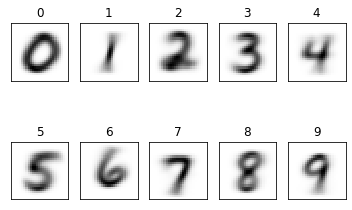

In [0]:
f1 = plt.figure()
for l, mean_of_l in dict.items():
    label       = l
    im_vector   = mean_of_l
    im_matrix   = im_vector.reshape((size_row, size_col))

    ax = plt.subplot(2, 5, l+1)
    ax.set_title(label)
    
    ax.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = f1.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

f1.show()

2. Present the output of the neural network with random weights [9pt]

consider a neural network with a fully connected layer using a logistic unit
assign random values from the normal distribution $\mathcal{N}(0, 1)$ with mean 0 and standard deviation 1 to the weights of the fully connected layer using a logistic unit
compute the forward propagation and take the average of the output values for the images of the same label
present the average values for each label in the increasing order of the label

In [0]:
for x in range(10):
    print("label ", x," : ",result[x])

label  0  :  0.024500129942284777
label  1  :  0.22379510628191004
label  2  :  0.07621864679565256
label  3  :  0.014851496135970707
label  4  :  0.13069543216821128
label  5  :  0.05553030721586085
label  6  :  0.045928984595048856
label  7  :  0.10571148981926948
label  8  :  0.025675479978510017
label  9  :  0.1188100627798907
